##  Healthcare Data on Heart Disease:

**Background:**
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

Presenting data visualisations to different deparment of HealthCare Provider


1. Head of Heart Department 

2. Heart specialist Department

3. Initial Check-up Department

**Data has been taken from:**
https://www.kaggle.com/ronitf/heart-disease-uci 

**Scope:**

1. Number of male and female individuals who are potentially target for heart diseases
2. Target with particular age group
3. Check-up data for targets


In [1]:
# import packages needed for the procedure
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and read the heart csv data
uci_heart = pd.read_csv('heart.csv', encoding='utf-8')

# Useful attributes of the dataset
uci_heart_columns = uci_heart.columns.tolist()
print("\nThe columns containing the features of this dataset are:\n", uci_heart_columns)
print("\nDIMENSION of the table is: \n", uci_heart.shape)
print("\nDATATYPES in the table are: \n", uci_heart.dtypes)
print("\n", uci_heart.size/14)


The columns containing the features of this dataset are:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

DIMENSION of the table is: 
 (303, 14)

DATATYPES in the table are: 
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

 303.0


In [2]:
# Code to take a look on the summary statistics using describe function of pandas
print ("\nLook on the summary statistics of the overall data\n")
print (uci_heart.describe())


Look on the summary statistics of the overall data

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604  

In [3]:
# print unique data of columns having unique data less than 10.

for col in uci_heart_columns:
    if len(uci_heart[col].unique()) <= 50:
        print ("\nThe uniqueness of col: ", col, "is")
        print (uci_heart[col].unique())
        print ("The lenght of the unique size is: ",len(uci_heart[col].unique()) )



The uniqueness of col:  age is
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
The lenght of the unique size is:  41

The uniqueness of col:  sex is
[1 0]
The lenght of the unique size is:  2

The uniqueness of col:  cp is
[3 2 1 0]
The lenght of the unique size is:  4

The uniqueness of col:  trestbps is
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
The lenght of the unique size is:  49

The uniqueness of col:  fbs is
[1 0]
The lenght of the unique size is:  2

The uniqueness of col:  restecg is
[0 1 2]
The lenght of the unique size is:  3

The uniqueness of col:  exang is
[0 1]
The lenght of the unique size is:  2

The uniqueness of col:  oldpeak is
[2.3 3.5 1.4 0.8 0.6 0.4 1.3 0.  0.5 1.6 1.2 0.2 1.8 1.  2.6 1.5 3.  2.4
 0.1 1.9 4.2 1.1 2.  0.7 0.3 0.9 3

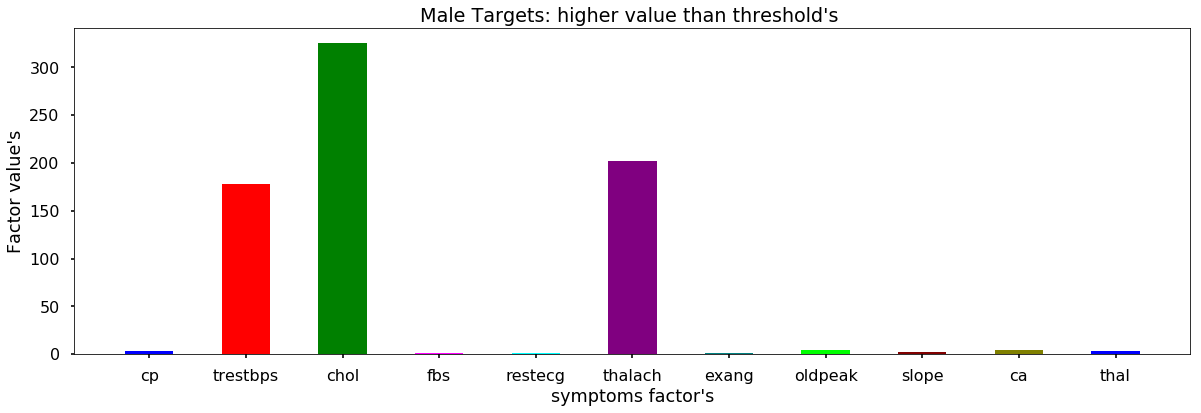

[3, 178, 325, 1, 1, 202, 1, 4.2, 2, 4, 3]


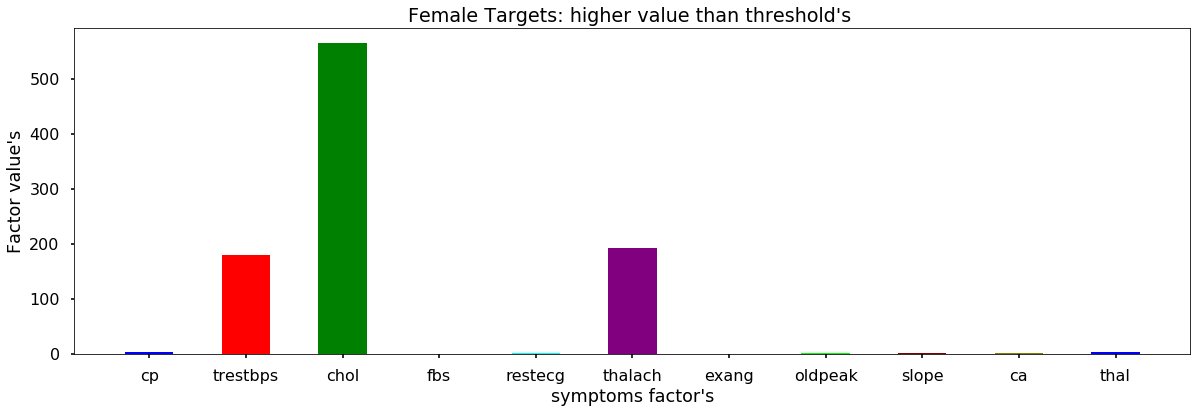

[3, 180, 564, 1, 2, 192, 1, 2.6, 2, 2, 3]


In [4]:
#Male targets:

uci_male = uci_heart['sex'] == 1
uci_target = uci_heart['target'] == 1
uci_male_target = uci_heart[uci_male & uci_target]

#print(uci_male_target)
#print(type(uci_male_target))
#print(uci_male_target['cp'].max())

uci_male_target_data = [uci_male_target['cp'].max(), uci_male_target['trestbps'].max(), uci_male_target['chol'].max(),
                        uci_male_target['fbs'].max(), uci_male_target['restecg'].max(), uci_male_target['thalach'].max(),
                        uci_male_target['exang'].max(),  uci_male_target['oldpeak'].max(),  uci_male_target['slope'].max(),
                        uci_male_target['ca'].max(), uci_male_target['thal'].max()]

uci_target_factor = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (20, 6)
plt.bar(uci_target_factor, uci_male_target_data , width=0.5, color=['blue', 'red', 'green', 'Fuchsia', 'Aqua', 'purple', 'teal', 'lime', 'maroon','olive'])
plt.title("Male Targets: higher value than threshold's ")
plt.xlabel("symptoms factor's")
plt.ylabel("Factor value's")
plt.show()

print(uci_male_target_data)

#Female targets:

uci_female = uci_heart['sex'] == 0
uci_target = uci_heart['target'] == 1
uci_female_target = uci_heart[uci_female & uci_target]
uci_female_target_data = [uci_female_target['cp'].max(), uci_female_target['trestbps'].max(), uci_female_target['chol'].max(),
                        uci_female_target['fbs'].max(), uci_female_target['restecg'].max(), uci_female_target['thalach'].max(),
                        uci_female_target['exang'].max(),  uci_female_target['oldpeak'].max(),  uci_female_target['slope'].max(),
                        uci_female_target['ca'].max(), uci_female_target['thal'].max()]

plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = (20, 6)
plt.bar(uci_target_factor, uci_female_target_data , width=0.5, color=['blue', 'red', 'green', 'Fuchsia', 'Aqua', 'purple', 'teal', 'lime', 'maroon','olive'])
plt.title("Female Targets: higher value than threshold's ")
plt.xlabel("symptoms factor's")
plt.ylabel("Factor value's")
plt.show()

print(uci_female_target_data)




[58, 57, 54, 59, 52, 51, 56, 44, 62, 60]
[7, 7, 10, 5, 9, 9, 5, 8, 4, 3]


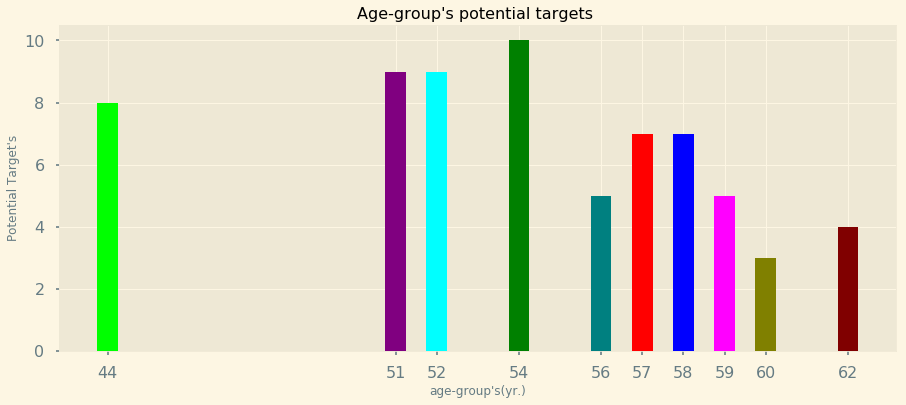

In [5]:
#Target with particular age group
import operator

def agegroup_table(dataframe, column):
    '''Returns frequency for age-group in dataframe.
    
    dataframe(dataFrame) : dataframe object
    column(str) : column name in dataframe
    
    retuns : dict of age-group
    '''
    age_group = {}
    for item in dataframe[column]:
        if item in age_group:
            age_group[item] += 1
        else:
            age_group[item] = 0
    return age_group


#getting top 10 age-groups of targets:
agegroup = agegroup_table(uci_heart, 'age')


#getting age-group key and age-group value:
i = 0
keyagegroup = []
valagegroup = []
while i < 10:
    y = max(agegroup.items(), key=operator.itemgetter(1))[0]
    keyagegroup.append(y)
    valagegroup.append(agegroup[y])
    agegroup.pop(y)
    i += 1

#getting age-group target occurences:
agegrouptarget = []
for age in keyagegroup:
    uci_age = uci_heart['age'] == age
    uci_target = uci_heart['target'] == 1
    agegrouptarget.append(int(uci_heart[uci_age & uci_target].size / 14))

print(keyagegroup)
print(agegrouptarget)
    
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = (15, 6)
plt.bar(keyagegroup, agegrouptarget  , width=0.5, color=['blue', 'red', 'green', 'Fuchsia', 'Aqua', 'purple', 'teal', 'lime', 'maroon','olive'])
plt.title("Age-group's potential targets ")
plt.xlabel("age-group's(yr.)")
plt.xticks(keyagegroup)
plt.ylabel("Potential Target's")
plt.show()


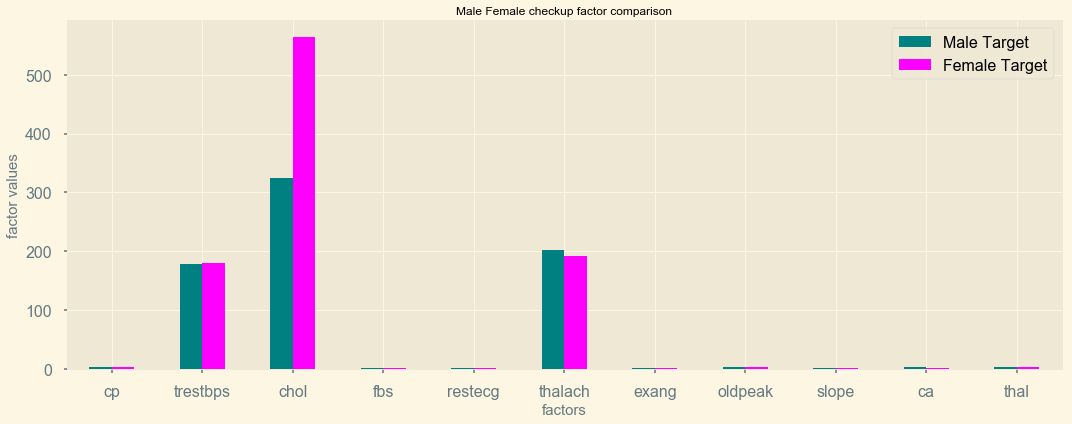

In [6]:
#check-up data for target male and female

MaleTarget = uci_male_target_data
FemaleTarget = uci_female_target_data
index = uci_target_factor
df = pd.DataFrame({'Male Target': uci_male_target_data, 'Female Target': uci_female_target_data}, index=index)
ax = df.plot.bar(rot=0, color=['teal', 'Fuchsia'])
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 6)
ax.set_title("Male Female checkup factor comparison")
ax.set_xlabel("factors", fontsize=15)
ax.set_ylabel('factor values', fontsize=15)
plt.tight_layout()


